In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


# EDA

## 1. Customer Signup Trends as per year

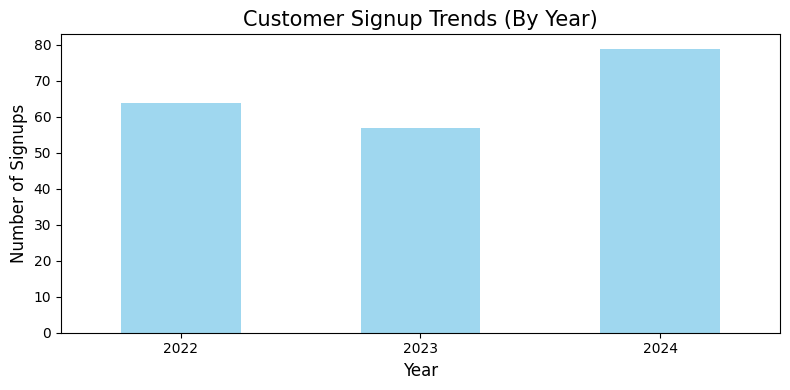

In [7]:
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 4))
signup_trends.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Customer Signup Trends (By Year)", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

## 2. Regional Distribution of Customers

In [8]:
region_distribution = customers['Region'].value_counts()

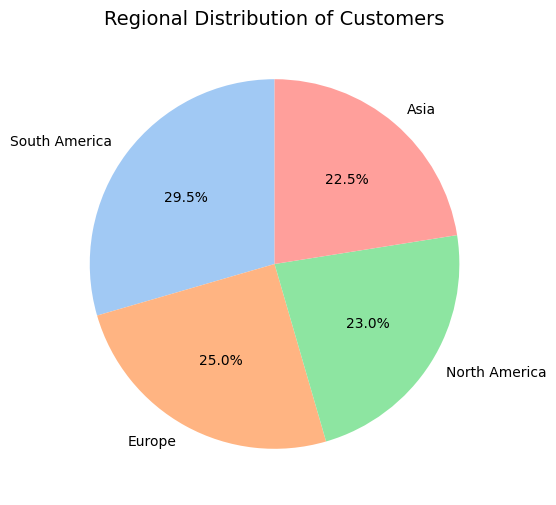

In [9]:
plt.figure(figsize=(6, 6))
region_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Regional Distribution of Customers", fontsize=14)
plt.ylabel("")

plt.show()

## 3. Top 5 Products by Sales Quantity

In [10]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(5).reset_index()

In [11]:
top_products = top_products.merge(products[['ProductID', 'ProductName']], on='ProductID')

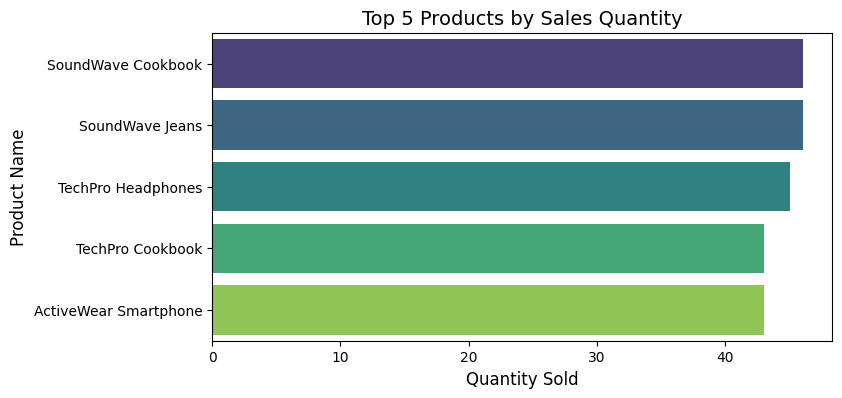

In [12]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top_products, y='ProductName', x='Quantity', palette='viridis')
plt.title("Top 5 Products by Sales Quantity", fontsize=14)
plt.xlabel("Quantity Sold", fontsize=12)
plt.ylabel("Product Name", fontsize=12)

plt.show()

## 4. Top 5 Customers by Total Transaction Value

In [13]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(5).reset_index()

In [14]:
top_customers = top_customers.merge(customers[['CustomerID', 'CustomerName']], on='CustomerID')

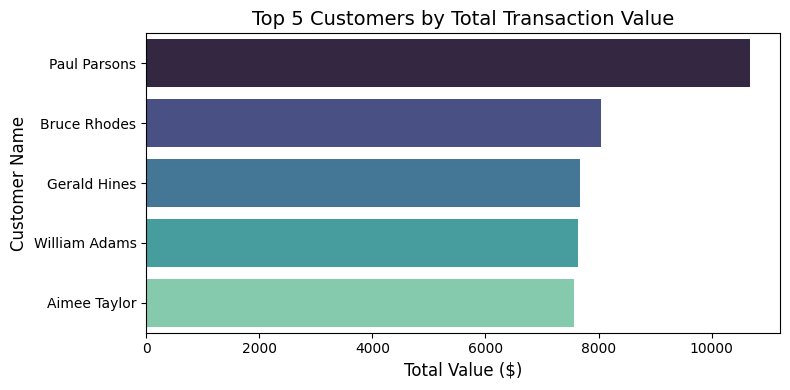

In [15]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top_customers, y='CustomerName', x='TotalValue', palette='mako')
plt.title("Top 5 Customers by Total Transaction Value", fontsize=14)
plt.xlabel("Total Value ($)", fontsize=12)
plt.ylabel("Customer Name", fontsize=12)
plt.tight_layout()
plt.show()

## 5. Visualize the sales contribution by category

In [16]:
category_sales = transactions.merge(products[['ProductID', 'Category']], on='ProductID')

In [17]:
category_sales_summary = category_sales.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).reset_index()

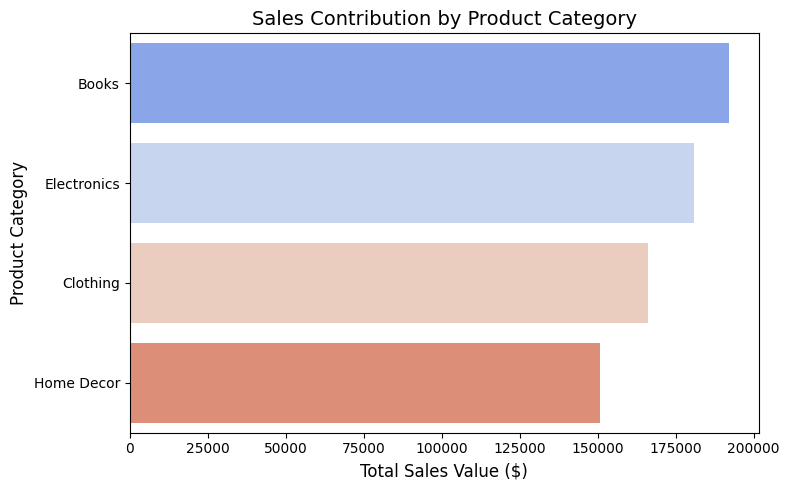

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales_summary, x='TotalValue', y='Category', palette='coolwarm')
plt.title("Sales Contribution by Product Category", fontsize=14)
plt.xlabel("Total Sales Value ($)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.tight_layout()
plt.show()